# **Introdução ao Projeto**

Neste projeto, desenvolvido para a disciplina de Introdução à Ciência de Dados, realizamos uma análise estatística detalhada e construímos um modelo de regressão linear para prever o valor de aluguel de imóveis em várias cidades do Brasil. O objetivo é utilizar técnicas estatísticas e de aprendizado de máquina para entender as variáveis que mais influenciam o valor do aluguel e criar um modelo preditivo robusto.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
aluguel = pd.read_csv('/content/drive/MyDrive/Python Aulas/Regressão Linear/casasBRaluguel.csv')

**Carregamento e Pré-processamento dos Dados**

Os dados são inicialmente carregados de um arquivo CSV que contém informações detalhadas sobre imóveis, como número de quartos, banheiros, vagas de garagem, e se o imóvel é mobiliado, entre outros.

Em seguida, foram verificados valores nulos e as colunas foram traduzidas para facilitar a interpretação e manipulação dos dados.

In [3]:
# verificando se há valores nulos "aluguel.isnull().sum()"
aluguel.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


**Análise Exploratória dos Dados**

Realizamos uma análise estatística inicial para identificar a distribuição dos valores de aluguel e identificar outliers (valores extremos) em diferentes cidades.

Utilizamos gráficos de boxplot e descrições estatísticas para entender melhor a distribuição dos dados e determinar se os outliers devem ser removidos ou ajustados

In [4]:
# Traduzindo as colunas
aluguel.columns = ['cidade', 'area', 'numquartos', 'numbanheiros',
                   'numvagas', 'andar',
                   'animal', 'mobiliado', 'valorcondominio',
                   'valoraluguel','iptu',
                   'seguroincendio', 'valortotal']

In [5]:
aluguel['cidade'].value_counts()

,count
cidade,
São Paulo,5887
Rio de Janeiro,1501
Belo Horizonte,1258
Porto Alegre,1193
Campinas,853


**Tratamento de Outliers**

Baseado na análise exploratória, aplicamos métodos estatísticos para identificar e remover outliers. Utilizamos a regra do IQR (Intervalo Interquartil) para definir limites superiores e eliminar valores de aluguel que estavam distorcendo a análise.

<Axes: xlabel='cidade', ylabel='valoraluguel'>

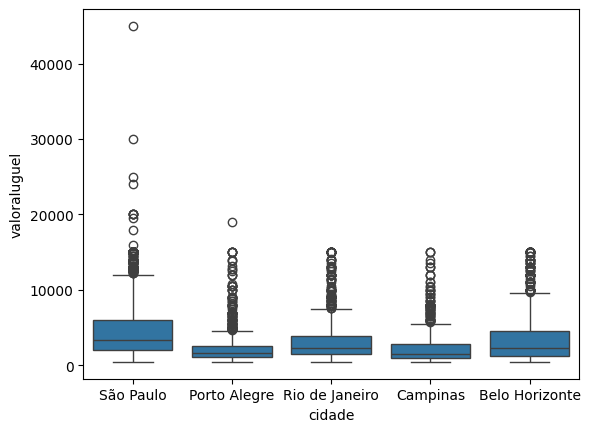

In [6]:
sns.boxplot(data=aluguel,
            x='cidade',
            y='valoraluguel')

Observamos outliers que estão nos alugueis em alguns pontos da cidade, deveremos tratar eles.

In [7]:
aluguel.groupby('cidade')['valoraluguel'].mean()

,valoraluguel
cidade,
Belo Horizonte,3664.127981
Campinas,2364.290739
Porto Alegre,2337.699916
Rio de Janeiro,3232.904064
São Paulo,4652.793783


In [8]:
# Analisando os dados de apenas uma coluna
aluguelSP = aluguel.query('cidade == "São Paulo"')

In [9]:
aluguelRJ = aluguel.query('cidade == "Rio de Janeiro"')

In [10]:
aluguelBH = aluguel.query('cidade == "Belo Horizonte"')

In [11]:
aluguelPA = aluguel.query('cidade == "Porto Alegre"')

In [12]:
aluguelCP = aluguel.query('cidade == "Campinas"')

**Observando a variável**

 Olharemos a variável valor alguem de São Paulo, e assim montaremos a formula para remover outliers superiores deles, haja vista que TODAS as cidades apenas tem outliers superiores

In [13]:
aluguelSP['valoraluguel'].describe()

,valoraluguel
count,5887.000000
mean,4652.793783
std,3634.612007
min,500.000000
25%,2000.000000
50%,3400.000000
75%,6000.000000
max,45000.000000


Limite superior: Q3 + 1,5 x IQR.

IQR = Q3 - Q1

In [14]:
aluguelSP = aluguel[aluguel['cidade'] == 'São Paulo']
outlierSP = aluguelSP['valoraluguel'].quantile(0.75)+1.5 * (aluguelSP['valoraluguel'].quantile(0.75)-
            aluguelSP['valoraluguel'].quantile(0.25))
aluguelSP = aluguelSP[aluguelSP['valoraluguel'] < outlierSP]

In [15]:
aluguelRJ = aluguel[aluguel['cidade'] == 'Rio de Janeiro']
outlierRJ = aluguelRJ['valoraluguel'].quantile(0.75)+1.5 * (aluguelRJ['valoraluguel'].quantile(0.75)-
            aluguelRJ['valoraluguel'].quantile(0.25))

aluguelRJ = aluguelRJ[aluguelRJ['valoraluguel'] < outlierRJ]

In [16]:
aluguelBH = aluguel[aluguel['cidade'] == 'Belo Horizonte']
outlierBH = aluguelBH['valoraluguel'].quantile(0.75)+1.5 * (aluguelBH['valoraluguel'].quantile(0.75)-
            aluguelBH['valoraluguel'].quantile(0.25))

aluguelBH = aluguelBH[aluguelBH['valoraluguel'] < outlierBH]

In [17]:
aluguelPA = aluguel[aluguel['cidade'] == 'Porto Alegre']
outlierPA = aluguelPA['valoraluguel'].quantile(0.75)+1.5 * (aluguelPA['valoraluguel'].quantile(0.75)-
            aluguelPA['valoraluguel'].quantile(0.25))

aluguelPA = aluguelPA[aluguelPA['valoraluguel'] < outlierPA]

In [18]:
aluguelCP = aluguel[aluguel['cidade'] == 'Campinas']
outlierCP = aluguelCP['valoraluguel'].quantile(0.75)+1.5 * (aluguelCP['valoraluguel'].quantile(0.75)-
            aluguelCP['valoraluguel'].quantile(0.25))

aluguelCP = aluguelCP[aluguelCP['valoraluguel'] < outlierCP]

**Dados Processados**

 Nesse ponto, não houve valores faltantes e com base em ESTATÍSTICA, conseguimos remover os outliers, utilizando a fórmulas de limite superiores.

In [19]:
# Aqui juntei todos os DataFrames em um só
alugueltratado = pd.concat([aluguelSP, aluguelRJ,
                            aluguelBH, aluguelPA,
                            aluguelCP])

In [20]:
alugueltratado.head()

,cidade,area,numquartos,numbanheiros,numvagas,andar,animal,mobiliado,valorcondominio,valoraluguel,iptu,seguroincendio,valortotal
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253


In [21]:
# Traduzindo para o português os valores 'acept' e 'furnished'
alugueltratado['mobiliado'] = alugueltratado['mobiliado'].replace('furnished', 'mobiliado')
alugueltratado['mobiliado'] = alugueltratado['mobiliado'].replace('not furnished', 'não mobiliado')
alugueltratado['animal'] = alugueltratado['animal'].replace('acept', 'aceita animais')
alugueltratado['animal'] = alugueltratado['animal'].replace('not acept', 'não aceita animais')

In [22]:
alugueltratado.head()

,cidade,area,numquartos,numbanheiros,numvagas,andar,animal,mobiliado,valorcondominio,valoraluguel,iptu,seguroincendio,valortotal
0,São Paulo,70,2,1,1,7,aceita animais,mobiliado,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,aceita animais,não mobiliado,1200,4960,1750,63,7973
4,São Paulo,25,1,1,0,1,não aceita animais,não mobiliado,0,800,25,11,836
5,São Paulo,376,3,3,7,-,aceita animais,não mobiliado,0,8000,834,121,8955
7,São Paulo,213,4,4,4,4,aceita animais,não mobiliado,2254,3223,1735,41,7253


**Modelagem Estatística: Regressão Linear**

Após o tratamento dos dados, construímos um modelo de regressão linear para prever o valor do aluguel com base nas variáveis selecionadas.

O modelo foi avaliado utilizando validação cruzada para garantir a robustez e generalização das previsões.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

<Axes: >

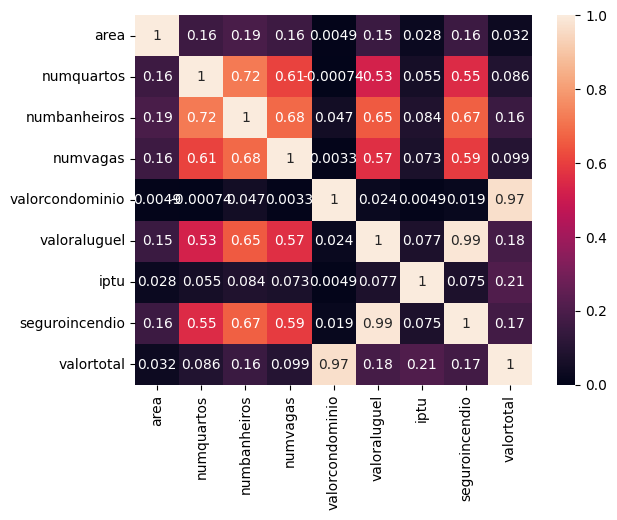

In [24]:
# Observar a correlação das variáveis
sns.heatmap(alugueltratado.select_dtypes('number').corr(), annot=True)

Agora, iremos pegar as variáveis preditoras (que tiveram maior correlação com a variável alvo) e separar elas. E iremos armazenar a variavel alvo também separadamente (a variável que queremos prever)

In [25]:
preditoras = alugueltratado[['numquartos','numbanheiros',
                             'numvagas','seguroincendio']]

alvo = alugueltratado['valoraluguel']

In [26]:
preditoras.head()

,numquartos,numbanheiros,numvagas,seguroincendio
0,2,1,1,42
1,4,4,0,63
4,1,1,0,11
5,3,3,7,121
7,4,4,4,41


In [27]:
alvo.head()

,valoraluguel
0,3300
1,4960
4,800
5,8000
7,3223


**1° Passo**

 Separar os dados em dois grupos, de treinamento e de teste

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(preditoras,
                                                alvo,
                                                test_size=0.3,
                                                random_state=1)

preditoras: São os dados que você vai usar para tentar fazer as previsões. Pode ser, nesse exemplo, o valor do aluguel

alvo: É o que você quer prever.

train_test_split: Essa função pega os seus dados e divide em duas partes: uma parte para treinar o modelo (train) e outra para testar se o modelo aprendeu bem (test).

test_size=3: Aqui estamos dizendo que queremos separar 3 exemplos dos nossos dados para testar o modelo. Isso significa que, se você tivesse 10 exemplos no total, 7 iriam para o treinamento e 3 iriam para o teste.

random_state=1: Isso é como se fosse um "sorteio" com o mesmo número, para que, toda vez que você rodar o código, a divisão dos dados aconteça sempre da mesma forma. Isso é útil para garantir que os resultados sejam consistentes.

xtrain e xtest: São as partes dos dados que usamos para fazer as previsões. O xtrain vai ser usado para ensinar o modelo, e o xtest vai ser usado para ver se o modelo aprendeu bem.

ytrain e ytest: Esses são os resultados que a gente já sabe (como o valor do aluguel). O ytrain é usado junto com xtrain para ensinar o modelo, e ytest é usado para ver se o modelo consegue prever corretamente os valores de ytest usando xtest.

Essa linha de código pega os seus dados, divide uma parte para treinar o modelo e outra parte para testar se o modelo aprendeu, tudo de uma forma que possa ser repetida sempre do mesmo jeito.

Se precisar de mais explicações ou ajuda para construir o código, estou aqui!

In [29]:
xtest.shape

(2956, 4)

In [30]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6897 entries, 5764 to 461
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   numquartos      6897 non-null   int64
 1   numbanheiros    6897 non-null   int64
 2   numvagas        6897 non-null   int64
 3   seguroincendio  6897 non-null   int64
dtypes: int64(4)
memory usage: 269.4 KB


In [31]:
alugueltratado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9853 entries, 0 to 10661
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cidade           9853 non-null   object
 1   area             9853 non-null   int64 
 2   numquartos       9853 non-null   int64 
 3   numbanheiros     9853 non-null   int64 
 4   numvagas         9853 non-null   int64 
 5   andar            9853 non-null   object
 6   animal           9853 non-null   object
 7   mobiliado        9853 non-null   object
 8   valorcondominio  9853 non-null   int64 
 9   valoraluguel     9853 non-null   int64 
 10  iptu             9853 non-null   int64 
 11  seguroincendio   9853 non-null   int64 
 12  valortotal       9853 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [32]:
modelo = LinearRegression()
modelo.fit(xtrain, ytrain) #Treinar o modelo

LinearRegression()

LinearRegression(): Cria um modelo de regressão linear.

fit(xtrain, ytrain): Treina o modelo usando os dados de treinamento para que ele aprenda a prever o valor do aluguel.

Depois de treinar o modelo, você pode usá-lo para prever o valor do aluguel de outros apartamentos usando dados novos

In [33]:
valoresPreditos = modelo.predict(xtest)
valoresPreditos

array([4268.65126392, 5511.58238799, 3294.8320753 , ..., 3735.873581  ,
       2802.73804192, 2688.56497321])

**Explicando as Linhas de Código**

valoresPreditos = modelo.predict(xtest):

Aqui, você está usando o modelo que foi treinado com os dados xtrain e ytrain para prever o valor do aluguel de novos apartamentos.

xtest contém as características (como número de quartos, banheiros, etc.) de apartamentos que não foram usados durante o treinamento do modelo.

A função predict pega essas características e usa o modelo para calcular o valor do aluguel que corresponde a cada conjunto de características em xtest.

O resultado é uma série de valores preditos, que são armazenados na variável

**valoresPreditos**.

valoresPreditos:

Esse array que você recebeu [4267.95468035, 5526.97765538, 3294.4249683] contém as previsões do modelo para os valores de aluguel dos apartamentos que estavam em xtest.
Cada número no array é a previsão do aluguel para um apartamento específico.

O Que Significa Esse Array?

4267.95468035: O modelo prevê que o primeiro apartamento em xtest teria um aluguel em torno de R$ 4.268,00.

5526.97765538: Para o segundo apartamento, o modelo prevê um aluguel em torno de R$ 5.527,00.

3294.4249683: Para o terceiro apartamento, a previsão é de um aluguel em torno de R$ 3.294,00.

Esses valores são estimativas baseadas nas variáveis preditoras que você forneceu no conjunto de teste xtest.

In [34]:
ytest

,valoraluguel
2189,3780
2390,4600
5668,3400
7809,1280
7864,5500
...,...
10667,1250
6632,4700
4623,3310
10496,2650


**Visualizando os valores Preditores x Valores reais**


In [35]:
import numpy as np

resultado = np.column_stack((ytest.values, valoresPreditos))
resultado = pd.DataFrame(resultado, columns=['Valor Real', 'Valor Predito'])
print(resultado[:10])

   Valor Real  Valor Predito
0      3780.0    4268.651264
1      4600.0    5511.582388
2      3400.0    3294.832075
3      1280.0    1383.241635
4      5500.0    5319.439368
5      6950.0    6535.453069
6      1500.0    1540.407365
7      2200.0    2066.436578
8      1400.0    1745.201468
9      2000.0    2034.769335


<ipython-input-36-8844e8117b92>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ytest, hist=False)
<ipython-input-36-8844e8117b92>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(valoresPreditos, hist=False, color='red')


<Axes: xlabel='valoraluguel', ylabel='Density'>

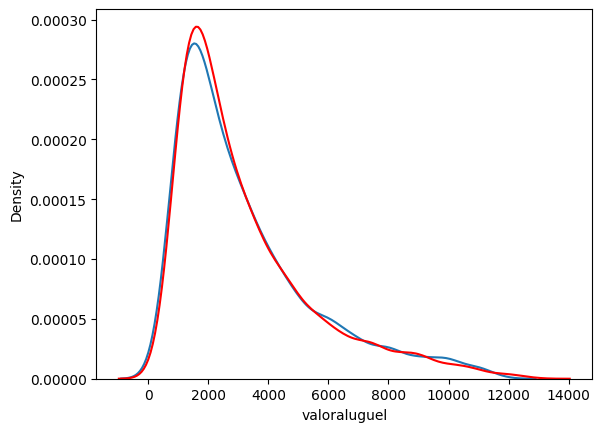

In [36]:
sns.distplot(ytest, hist=False)
sns.distplot(valoresPreditos, hist=False, color='red') # Curva vermelha é a curva prevista

Curvas Sobrepostas:

As curvas azul e vermelha estão bastante sobrepostas, o que indica que a distribuição dos valores preditos pelo modelo está muito próxima da distribuição dos valores reais.

Isso é um bom sinal, pois sugere que o modelo está capturando bem a tendência dos dados.
Pico nas Curvas:

Ambas as curvas têm um pico em torno de valores de aluguel mais baixos (entre R$ 1.000 e R$ 2.500), o que provavelmente reflete a concentração dos dados nesse intervalo.

O modelo parece estar acompanhando bem a distribuição dos valores reais, especialmente nessa faixa.
Cauda das Curvas:

A cauda das distribuições (em direção aos valores mais altos de aluguel) também segue um padrão semelhante entre as curvas azul e vermelha.
Isso sugere que o modelo está razoavelmente bem ajustado, mesmo para os valores mais extremos.

# **Reta Final**

Agora iremos calcular alguns erros e testar o modelo.

**Erro Médio Absoluto (MAE)**

**O que é:** O MAE é a média das diferenças absolutas entre os valores reais e os valores preditos. Em outras palavras, ele mede a média dos erros em termos absolutos, sem considerar a direção do erro (se é positivo ou negativo).

**Interpretação:** Quanto menor o MAE, melhor o modelo. Um MAE de 0 significa que o modelo fez previsões perfeitas.

In [37]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ytest, valoresPreditos)
print(f'O Erro Médio Absoluto é de {mae}')

O Erro Médio Absoluto é de 263.158614033978


Isso quer dizer que meu modelo erra aproximadamente R$263,16 reais. Quanto mais próximo de 0, mais perfeito é o modelo.

**Erro Quadrático Médio (MSE)**

**O que é:** O MSE é a média dos quadrados das diferenças entre os valores reais e os valores preditos. Ele penaliza mais os erros maiores, pois o erro é elevado ao quadrado.

**Interpretação:** Como o MAE, quanto menor o MSE, melhor. No entanto, por elevar ao quadrado as diferenças, o MSE enfatiza mais os grandes erros.

In [38]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, valoresPreditos)
print(f'O Erro Quadrático Médio é de {mse}')

O Erro Quadrático Médio é de 170318.8246467041


**Coeficiente de Determinação (R²)**

**O que é:** O R² mede quanta da variabilidade dos dados é explicada pelo modelo. É uma métrica que varia entre 0 e 1 (ou até pode ser negativa), onde 1 indica que o modelo explica perfeitamente a variabilidade dos dados.

**Interpretação:** Um R² próximo de 1 indica que o modelo explica bem a variabilidade dos dados. Um R² de 0 indica que o modelo não consegue explicar nenhuma variabilidade.

In [39]:
from sklearn.metrics import r2_score
r2 = r2_score(ytest, valoresPreditos)
print(f'O Coeficiente de Determinação é de (R²): {r2}')

O Coeficiente de Determinação é de (R²): 0.9679600227729737


O modelo está explicando bem a variabilidade dos dados

In [42]:
rmse = mean_squared_error(ytest, valoresPreditos, squared=False)
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse}")


Raiz do Erro Quadrático Médio (RMSE): 412.6970131303401


In [44]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelo, preditoras, alvo, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print("Raiz do Erro Quadrático Médio (RMSE) para cada fold:")
print(rmse_scores)
print("Média do RMSE:", rmse_scores.mean())


Raiz do Erro Quadrático Médio (RMSE) para cada fold:
[411.25197589 477.00085966 405.1615245  386.04062426 320.10367515]
Média do RMSE: 399.91173189105797


**O que faz:**

**cross_val_score:** Executa o processo de validação cruzada no modelo que você forneceu (modelo).

**modelo**: Este é o modelo de aprendizado de máquina que você está avaliando. Ele já foi definido e treinado anteriormente no seu código.

**preditoras:** Este é o conjunto de dados que contém as variáveis preditoras (ou seja, as variáveis independentes que o modelo usa para fazer previsões).

**alvo:** Este é o conjunto de dados que contém as variáveis alvo (ou seja, os valores que você está tentando prever, como os valores de aluguel no seu caso).

**cv=5:** Isso indica que você está utilizando uma validação cruzada de 5-folds, ou seja, os dados serão divididos em 5 partes.
O modelo será treinado 5 vezes, cada vez usando 4 partes para treinar e 1 parte para testar.

**scoring**='neg_mean_squared_error': Isso especifica que a métrica usada para avaliar o desempenho do modelo em cada fold será o Erro Quadrático Médio Negativo (MSE).
O **cross_val_score** retorna pontuações negativas para erros, por isso o "negativo".

**O que retorna:**

scores será um array contendo as pontuações (neste caso, os valores do MSE negativo) para cada um dos 5 folds.

RMSE como porcentagem da média do aluguel: 12.81%


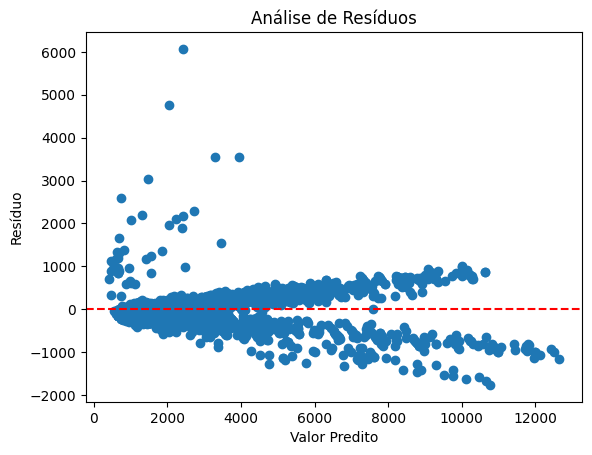

In [45]:
# Calcular a proporção do RMSE sobre a média dos valores de aluguel
media_aluguel = ytest.mean()
print(f"RMSE como porcentagem da média do aluguel: {rmse / media_aluguel * 100:.2f}%")

# Plotar os resíduos
residuos = ytest - valoresPreditos
plt.scatter(valoresPreditos, residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valor Predito')
plt.ylabel('Resíduo')
plt.title('Análise de Resíduos')
plt.show()


**O que o gráfico mostra:** O gráfico de resíduos mostra as diferenças entre os valores preditos e os valores reais. Idealmente, os resíduos devem estar aleatoriamente distribuídos em torno de 0. No entanto, no seu gráfico, podemos ver alguns padrões:

  Há uma maior variabilidade nos resíduos para valores preditos mais baixos, indicando que o modelo tem mais dificuldade em prever valores de aluguel baixos.
  
  Existem alguns resíduos muito altos (acima de 4.000), que sugerem erros significativos em alguns casos específicos. Isso pode indicar que o modelo está superestimando ou subestimando drasticamente para certos exemplos.

# **Conclusões Finais**

 **O modelo está bom, mas não perfeito:** O modelo é capaz de explicar bem a maioria dos dados (como indicado pelo R² alto), mas ainda comete alguns erros significativos, principalmente para valores de aluguel mais baixos.

 **Erros maiores são um ponto de atenção:** O fato de o RMSE ser maior que o MAE e a presença de grandes resíduos indicam que há alguns valores onde o modelo não está performando tão bem.

